In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('logs.csv', sep=';')

df.head()

,file,program,mode,size,step,time_taken
0,test,vanilla,0,100,10000,2.430369
1,test,vanilla,0,100,10000,2.410400
2,test,vanilla,0,100,10000,2.424340
3,test,vanilla,1,100,10000,2.415090
4,test,vanilla,1,100,10000,2.414487


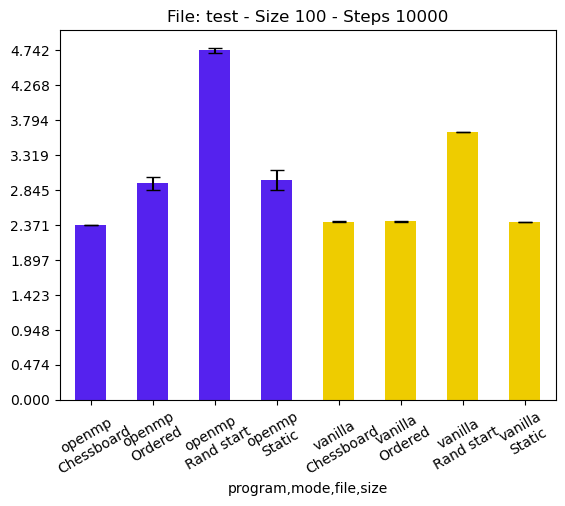

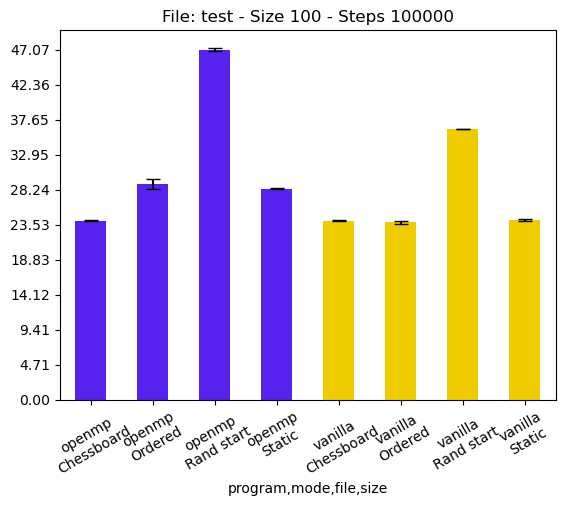

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Replace mode with more readable values
df['mode'] = df['mode'].replace({0: 'Ordered', 1: 'Static', 2: 'Rand start', 3: 'Chessboard'})

# Get unique 'file' values
file_values = df['file'].unique()
# Get unique 'step' values
step_values = df['step'].unique()
# Get unique 'size' values
size_values = df['size'].unique()

for file_value in file_values:
    for size_value in size_values:
        for step_value in step_values:
            # Get subset of dataframe for each file, size and step
            subset = df[(df['step'] == step_value) & (df['file'] == file_value) & (df['size'] == size_value)]

            # Get mean and standard deviation of time_taken for each mode
            mean_time = subset.groupby(['program', 'mode', 'file', 'size'])['time_taken'].mean()
            std_dev = subset.groupby(['program', 'mode', 'file', 'size'])['time_taken'].std()

            # Define a color map for the programs
            color_map = {'vanilla': '#EC0', 'openmp': '#52E', 'mpi': 'green'}

            # Plot the data using the color map
            plot = mean_time.plot(kind='bar', yerr=std_dev, capsize=5, color=[color_map[program] for program, _, _, _ in mean_time.index])

            # Add title and axis names
            plot.set_title(f'File: {file_value} - Size {size_value} - Steps {step_value}')

            # Get current y-axis limits
            ymin, ymax = plot.get_ylim()

            # Define the new ticks (this example generates ticks at 0.1 intervals)
            new_ticks = np.arange(ymin, ymax, 0.1 * mean_time.max())
            plot.set_yticks(new_ticks)

            # Edit x-axis labels to have program and mode
            plot.set_xticklabels([f'{program}\n{mode}' for program, mode, _, _ in mean_time.index])

            # Rotate x-axis labels by 45 degrees
            plt.xticks(rotation=30)

            # To display the plot with the new tick marks and rotated labels
            plt.show()
